In [3]:
!pip install unsloth transformers torch torchvision accelerate pillow requests

In [ ]:
import torch
from PIL import Image
from transformers import TextStreamer
from unsloth import FastVisionModel
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# ------------------- Configuration -------------------
model_name = "Gobi2005/Medical-Caption-Generator"  # Replace with your Hugging Face model repo
load_in_4bit = True
device = "cuda" if torch.cuda.is_available() else "cpu"

# ------------------- Load Model & Tokenizer -------------------
model, tokenizer = FastVisionModel.from_pretrained(
    model_name=model_name,
    load_in_4bit=load_in_4bit,
    token = 'MY_TOKEN'
)
FastVisionModel.for_inference(model)



==((====))==  Unsloth 2025.6.2: Fast Mllama patching. Transformers: 4.51.3.
   \\   /|    Tesla T4. Num GPUs = 2. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 7.5. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): MllamaForConditionalGeneration(
      (vision_model): MllamaVisionModel(
        (patch_embedding): Conv2d(3, 1280, kernel_size=(14, 14), stride=(14, 14), padding=valid, bias=False)
        (gated_positional_embedding): MllamaPrecomputedPositionEmbedding(
          (tile_embedding): Embedding(9, 8197120)
        )
        (pre_tile_positional_embedding): MllamaPrecomputedAspectRatioEmbedding(
          (embedding): Embedding(9, 5120)
        )
        (post_tile_positional_embedding): MllamaPrecomputedAspectRatioEmbedding(
          (embedding): Embedding(9, 5120)
        )
        (layernorm_pre): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
        (layernorm_post): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
        (transformer): MllamaVisionEncoder(
          (layers): ModuleList(
            (0-12): 13 x MllamaVisionEncoderLayer(
              (self_attn): MllamaVisionSdpaAttention(
               

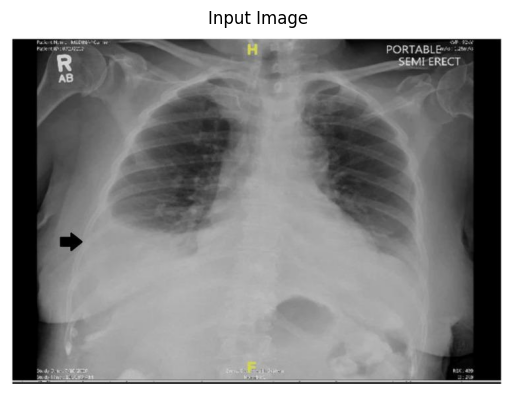

In [27]:
# ------------------- Load Image from URL -------------------
image_url = "https://datasets-server.huggingface.co/cached-assets/unsloth/Radiology_mini/--/12468bc1f3cecf1056c290182a0e88ce506049f9/--/default/test/7/image/image.jpg?Expires=1750084188&Signature=jx-kHL6lw2SVn-qHS2b3jNjyS84O6g~OuJ6u6h5T8K6iMujzvsZeCqc4nCcu0N8R4sUa2lq7a~HqAr79CRyDeNngF4l0Feoe-USPKaJUwiSH-V4oniqiJrzBiayYaWI3KAiZfwrgiwZgGu-WJlRk3TmsW3VOm3sGLvNAOzaWe1Fns-v9qBZYr5id-iuz6vBQOFyDz~duaqXhPlWym52YJX1LguxjdMIvJb4rFqaHwpLLNM0Q2l3Zjpm1LNebHsubbMu-E2I8qr9ak~mY1wPqJsg8hUeMNX7pBjLy1yqQ-VBki~ulU1b1oZCJXaHsiV0GrI0GFWGIKgB22mmOfXCiEA__&Key-Pair-Id=K3EI6M078Z3AC3"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content)).convert("RGB")

# ------------------- Display Image -------------------
plt.imshow(image)
plt.axis('off')
plt.title("Input Image")
plt.show()



In [28]:
# ------------------- Create Chat Input -------------------
instruction = "You are a board-certified radiologist. Provide a concise, diagnosis-focused, and highly accurate caption for this radiology image. Include the imaging modality, key findings, relevant abnormalities, and probable diagnosis using precise and professional medical terminology. Use phrases or short statements rather than full sentences. Avoid headings, bullet points, numbering, lists, or line breaks. Write as one clear, continuous paragraph suitable for clinical use."

messages = [
    {"role": "user", "content": [
        {"type": "image"},
        {"type": "text", "text": instruction}
    ]}
]

input_text = tokenizer.apply_chat_template(messages, add_generation_prompt=True)

# ------------------- Tokenize -------------------
inputs = tokenizer(
    image,
    input_text,
    add_special_tokens=False,
    return_tensors="pt",
).to(device)

# ------------------- Inference -------------------
text_streamer = TextStreamer(tokenizer, skip_prompt=True)

_ = model.generate(
    **inputs,
    streamer=text_streamer,
    max_new_tokens=512,
    use_cache=True,
    do_sample=False,
    temperature=0.4
)


Chest X-ray showing a large right-sided pleural effusion (arrow).<|eot_id|>
